# Visualisation

Sur cette section, nous allons effectuer différentes opérations de visualisation sur notre jeu de données initialement récolté et nettoyé.

In [2]:
# Module pandas pour manipuler le dataframe ensuite constitué :
import pandas as pd

# Module numpy pour manipuler essentiellement des arrays :
import numpy as np

# Modules pour la visualisation :
import matplotlib.pyplot as plt
import seaborn as sns

On importe la base de données clean :

In [79]:
df = pd.read_csv("data/data_cleaned.csv", sep = "\t")

In [3]:
df.head(10)

,tconst,title,year,runtime,genres,rate,votes,director,casting
0,tt13143964,Borat: Subsequent Moviefilm,2020,95,Comedy,7.0,50191,Jason Woliner,"['Sacha Baron Cohen', 'Maria Bakalova', 'Tom H..."
1,tt1070874,Les Sept de Chicago,2020,129,"Drama, History, Thriller",7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ..."
2,tt2235695,Rebecca,2020,121,"Drama, Mystery, Romance",6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ..."
3,tt10682266,Hubie Halloween,2020,102,"Comedy, Fantasy, Mystery",5.2,27526,Steven Brill,"['Adam Sandler', 'Kevin James', 'Julie Bowen',..."
4,tt2222042,Love and Monsters,2020,109,"Action, Adventure, Comedy",7.1,10780,Michael Matthews,"[""Dylan O'Brien"", 'Jessica Henwick', 'Michael ..."
5,tt0805647,Sacrées sorcières,2020,106,"Adventure, Comedy, Family",5.4,5605,Robert Zemeckis,"['Anne Hathaway', 'Octavia Spencer', 'Stanley ..."
6,tt0107120,Hocus Pocus: Les trois sorcières,1993,96,"Comedy, Family, Fantasy",6.9,97876,Kenny Ortega,"['Bette Midler', 'Sarah Jessica Parker', 'Kath..."
7,tt10362466,After: Chapitre 2,2020,105,"Drama, Romance",5.2,7501,Roger Kumble,"['Josephine Langford', 'Hero Fiennes Tiffin', ..."
8,tt7846844,Enola Holmes,2020,123,"Adventure, Crime, Drama",6.6,91329,Harry Bradbeer,"['Millie Bobby Brown', 'Henry Cavill', 'Sam Cl..."
9,tt6723592,Tenet,2020,150,"Action, Sci-Fi",7.8,138378,Christopher Nolan,"['John David Washington', 'Robert Pattinson', ..."


## Visualisation henri

Il serait pertinent d'étudier les tendances de préférences pour les films selon leur genres principaux. 

Pour ce faire, comme de nombreux films possèdent plusieurs genres, on va devoir split la base de données :

In [38]:
df_test = df.head(10) # Test sur 10 films

In [39]:
s = df_test["genres"].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del df_test['genres']
df_genres = df_test.join(s)

In [40]:
df_genres

,tconst,title,year,runtime,rate,votes,director,casting,genres
0,tt13143964,Borat: Subsequent Moviefilm,2020,95,7.0,50191,Jason Woliner,"['Sacha Baron Cohen', 'Maria Bakalova', 'Tom H...",Comedy
1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",Drama
1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",History
1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",Thriller
2,tt2235695,Rebecca,2020,121,6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ...",Drama
2,tt2235695,Rebecca,2020,121,6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ...",Mystery
2,tt2235695,Rebecca,2020,121,6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ...",Romance
3,tt10682266,Hubie Halloween,2020,102,5.2,27526,Steven Brill,"['Adam Sandler', 'Kevin James', 'Julie Bowen',...",Comedy
3,tt10682266,Hubie Halloween,2020,102,5.2,27526,Steven Brill,"['Adam Sandler', 'Kevin James', 'Julie Bowen',...",Fantasy
3,tt10682266,Hubie Halloween,2020,102,5.2,27526,Steven Brill,"['Adam Sandler', 'Kevin James', 'Julie Bowen',...",Mystery


L'opération devient beaucoup plus longue pour tous les films de la base. Afin de s'épargner de ce temps d'attente, nous avons effectué l'opération uniquement une fois puis save la base désirée pour tous les films sous le nom de *data_genres_split.csv* sur le GitHub dans le dossier **data**. Nous l'utiliserons ainsi pour faire les analyses désirées concernant les genres 

On charge ainsi la base *data_genres_split* : 

In [3]:
df_genres_split = pd.read_csv("data/data_genres_split.csv", sep = "\t")

La base est bien chargée :

In [4]:
df_genres_split

,index,tconst,title,year,runtime,rate,votes,director,casting,genres
0,0,tt13143964,Borat: Subsequent Moviefilm,2020,95,7.0,50191,Jason Woliner,"['Sacha Baron Cohen', 'Maria Bakalova', 'Tom H...",Comedy
1,1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",Drama
2,1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",History
3,1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",Thriller
4,2,tt2235695,Rebecca,2020,121,6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ...",Drama
...,...,...,...,...,...,...,...,...,...,...
343714,188252,tt0182675,Adsiz cengaver,1970,83,5.5,1240,Halit Refig,"['Cüneyt Arkin', 'Nebahat Çehre', 'Birsen Ayda...",Adventure
343715,188252,tt0182675,Adsiz cengaver,1970,83,5.5,1240,Halit Refig,"['Cüneyt Arkin', 'Nebahat Çehre', 'Birsen Ayda...",Fantasy
343716,188253,tt2794316,Awara,2012,160,5.5,3550,Rabi Kinagi,"['Jeet', 'Sayantika Banerjee', 'Mukul Dev', 'A...",Action
343717,188254,tt1587857,Shatru,1984,150,7.9,370,Anjan Choudhury,"['Ranjit Mallick', 'Anup Kumar', 'Chiranjit', ...",Crime


On peut passer à l'analyse sur le genre, nottamment étudions par exemple la note moyenne par genre pour les 10 genres les plus présents sur la base.


In [52]:
print(df_genres_split["genres"].unique())
print(len(df_genres_split["genres"].unique()))

['Comedy' 'Drama' 'History' 'Thriller' 'Mystery' 'Romance' 'Fantasy'
 'Action' 'Adventure' 'Family' 'Crime' 'Sci-Fi' 'Music' 'Horror'
 'Biography' 'Sport' 'Animation' 'War' 'Musical' 'Western' 'Film-Noir'
 'Adult' 'Reality-TV' 'News' 'Documentary' 'Short' 'Talk-Show' 'Game-Show']
28


Il y a 28 genres de films différents dans la base de données

In [5]:
df_genres_split.groupby("genres")["genres"].count().sort_values(ascending= False).head(10)

genres
Drama        101427
Comedy        58087
Romance       25967
Action        24061
Crime         19997
Thriller      19145
Horror        16304
Adventure     14591
Mystery        8787
Family         8208
Name: genres, dtype: int64

In [8]:
list_genres = ["Drama", "Comedy", "Romance", "Action", "Crime", "Thriller", "Horror",
         "Adventure", "Mystery", "Family"]

In [9]:
df_genres_10 = df_genres_split[df_genres_split["genres"].isin(list_genres)].reset_index()

In [111]:
means = df_genres_10.groupby("genres")["rate"].mean()

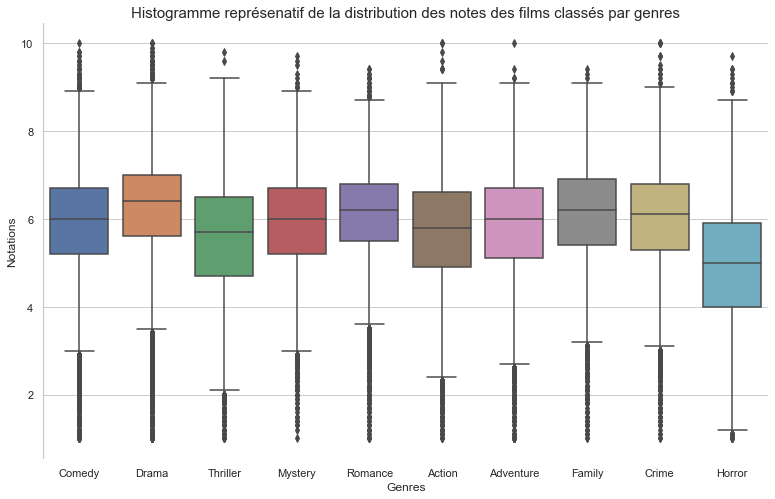

In [49]:
sns.set(rc={'figure.figsize':(13,8)}) # taille de la figure
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid") # style du graphique 
sns.boxplot(x="genres", y="rate", data = df_genres_10,
            palette = "deep").set(xlabel = "Genres", ylabel = "Notations") # classés par genre, histogramme des rates
sns.despine(bottom = True)
plt.title("Histogramme représenatif de la distribution des notes des films classés par genres", size=15)
plt.show()